In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
feature_name = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [5]:
feature_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [12]:
names = feature_name.iloc[:, 1].values.tolist()
names[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [13]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, delim_whitespace=True, header=None)
X_test = pd.read_csv(X_test_url, delim_whitespace=True, header=None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [15]:
X_train.columns = names
X_test.columns = names
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [20]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, delim_whitespace=True, header=None, names=['action'])
y_test = pd.read_csv(y_test_url, delim_whitespace=True, header=None, names=['action'])
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [18]:
X_train.shape, X_test.shape

((7352, 561), (2947, 561))

In [19]:
y_train.shape, y_test.shape

((7352, 1), (2947, 1))

In [21]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

## DecisionTree

In [26]:
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

print('학습 데이터 정확도: {:.3f}'.format(dt_clf.score(X_train, y_train)))
print('테스트 데이터 정확도: {:.3f}'.format(dt_clf.score(X_test, y_test)))

print('Accuracy : {:.3f}'.format(accuracy_score(y_test, pred)))

학습 데이터 정확도: 0.898
테스트 데이터 정확도: 0.810
Accuracy : 0.810


In [28]:
params = {
    'max_depth':[6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [29]:
grid_cv.best_score_, grid_cv.best_params_

(0.8543335321892183, {'max_depth': 8})

In [31]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, random_state=13)

In [32]:
cv_results = pd.DataFrame(grid_cv.cv_results_)
cv_results[['param_max_depth', 'mean_test_score', 'mean_train_score']] 
# 여기서 제공하는 테스트 점수는 실제 테스트 데이터에 대한 점수가 아니라, cv 단계에서 사용한 검증 데이터에 대한 점수임

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


<AxesSubplot: xlabel='param_max_depth'>

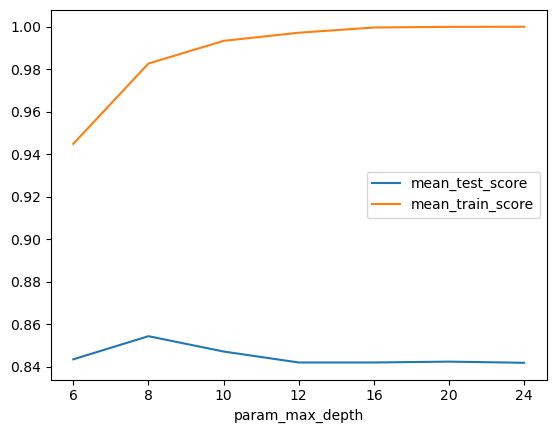

In [34]:
cv_results[['param_max_depth', 'mean_test_score', 'mean_train_score']].plot(x='param_max_depth', y=['mean_test_score', 'mean_train_score'])

In [42]:
feature_importances = grid_cv.best_estimator_.feature_importances_
used_feature = {feature: importance for feature, importance in zip(names, feature_importances) if importance > 0}
sorted(used_feature.items(), key=lambda x: x[1], reverse=True)

[('tGravityAcc-min()-X', 0.25276070455322835),
 ('fBodyAccJerk-bandsEnergy()-1,24', 0.21353676339485053),
 ('angle(Y,gravityMean)', 0.138674874291231),
 ('fBodyAccMag-energy()', 0.11520784937011738),
 ('tGravityAcc-arCoeff()-Z,2', 0.10130990734822179),
 ('fBodyGyro-maxInds-X', 0.023914707394796553),
 ('tBodyGyro-correlation()-Y,Z', 0.016474746519557375),
 ('tGravityAcc-energy()-Y', 0.01639492399368535),
 ('tGravityAccMag-arCoeff()1', 0.012582591650101546),
 ('fBodyAcc-max()-Y', 0.008803880573089347),
 ('tBodyGyro-max()-X', 0.008529595707880309),
 ('tBodyAcc-correlation()-X,Y', 0.007648542433068218),
 ('tGravityAcc-max()-Y', 0.006275587931131618),
 ('tGravityAcc-min()-Y', 0.006099326393665726),
 ('fBodyGyro-max()-X', 0.005234467298021598),
 ('tBodyGyro-min()-X', 0.004362618449527065),
 ('tBodyAccJerk-correlation()-X,Y', 0.003957441669875095),
 ('tBodyGyroJerk-max()-X', 0.003462970549314918),
 ('tBodyAccMag-arCoeff()1', 0.003121746205149024),
 ('tGravityAcc-arCoeff()-Y,3', 0.003017452164

In [43]:
max_depth = [6, 8, 10, 12, 16, 20, 24]
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    print('max_depth : {}, Accuracy : {:.3f}'.format(depth, accuracy_score(y_test, pred)))

max_depth : 6, Accuracy : 0.855
max_depth : 8, Accuracy : 0.873
max_depth : 10, Accuracy : 0.862
max_depth : 12, Accuracy : 0.860
max_depth : 16, Accuracy : 0.867
max_depth : 20, Accuracy : 0.865
max_depth : 24, Accuracy : 0.865


In [45]:
best_estimator = grid_cv.best_estimator_
best_estimator.fit(X_train, y_train)

pred = best_estimator.predict(X_test)
round(accuracy_score(y_test, pred), 3)

0.873

## RandomForest

In [46]:
params = {
    'max_depth':[6, 8, 10],
    'n_estimators':[50, 100, 200],
    'min_samples_leaf':[8, 12],
    'min_samples_split':[8, 12]
}

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=13)
grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

c:\Users\mase8\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [47]:
grid_cv.best_score_, grid_cv.best_params_

(0.9242422897099016,
 {'max_depth': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 50})

In [63]:
cv_results = pd.DataFrame(grid_cv.cv_results_)
cv_results = cv_results[['rank_test_score', 'param_max_depth', 
                         'param_min_samples_leaf', 'param_min_samples_split', 
                     'param_n_estimators', 'mean_test_score', 'mean_fit_time']].sort_values(['rank_test_score', 'mean_fit_time'], ascending=True).reset_index(drop=True)
cv_results

,rank_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,mean_fit_time
0,1,10,8,8,50,0.924242,25.647079
1,1,10,8,12,50,0.924242,25.949594
2,3,10,12,12,50,0.923971,26.179418
3,3,10,12,8,50,0.923971,27.198024
4,5,8,8,12,100,0.923156,36.273828
5,5,8,8,8,100,0.923156,36.281935
6,7,10,8,8,200,0.922883,78.299445
7,7,10,8,12,200,0.922883,79.781309
8,9,10,12,12,100,0.922883,38.479289
9,9,10,12,8,100,0.922883,41.075306


In [65]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50, n_jobs=-1, random_state=13)

In [69]:
rf_best = grid_cv.best_estimator_
y_train_1d = y_train.values.ravel()
rf_best.fit(X_train, y_train_1d)

pred = rf_best.predict(X_test)
round(accuracy_score(y_test, pred), 4)

0.922

In [71]:
best_feature_values = rf_best.feature_importances_
best_feature_20 = pd.DataFrame(best_feature_values, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)[:20]
best_feature_20

,importance
tGravityAcc-min()-X,0.039210
tGravityAcc-max()-Y,0.039201
tGravityAcc-energy()-X,0.031762
"angle(X,gravityMean)",0.031216
tGravityAcc-mean()-Y,0.026709
tGravityAcc-mean()-X,0.024974
tGravityAcc-max()-X,0.024267
tGravityAcc-min()-Y,0.019642
tGravityAcc-energy()-Y,0.019610
tGravityAcc-mean()-Z,0.018478


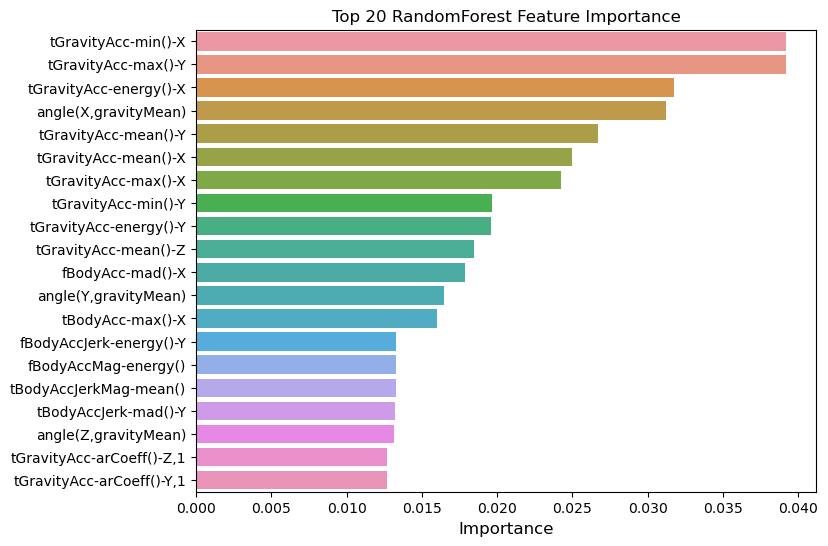

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y=best_feature_20.index, data=best_feature_20)
plt.title('Top 20 RandomForest Feature Importance')
plt.xlabel('Importance', fontsize=12)
plt.show()

In [76]:
X_train_re = X_train[best_feature_20.index]
X_test_re = X_test[best_feature_20.index]

rf_best.fit(X_train_re, y_train_1d)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50, n_jobs=-1, random_state=13)

In [77]:
pred = rf_best.predict(X_test_re)
round(accuracy_score(y_test, pred), 4)

0.8426